<a href="https://colab.research.google.com/github/OmprakashDebata/Bike-Sharing-Demand-Regression/blob/main/Bike_sharing_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction(Regression)



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Omprakash Debata

# **Project Summary -**

This independent project's primary objective was to enhance urban mobility through bike-sharing programs in Seoul, South Korea, by accurately predicting bike rental demand. The project encompassed various essential stages, including data collection, exploration, model selection, and deployment. Leveraging historical data on factors like temperature and time, the aim was to maintain a consistent supply of bikes for rental within metropolitan areas.

- The dataset contained 8760 records and comprised 14 attributes.

- The initial steps involved importing the dataset and essential libraries, followed by a comprehensive exploratory data analysis (EDA) phase.    

-  We employed a combination of visualizations and statistical analyses, encompassing histograms, scatter plots, and correlation matrices, to unveil underlying patterns and relationships within the dataset.

- To prepare the data for machine learning models, we meticulously addressed outliers and null values, and performed necessary transformations to ensure data compatibility.

- The process of model selection entailed an exhaustive exploration of multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression as well as Random Forest and Gradient Boosting.

- To fine-tune model performance independently, we employed techniques like GridSearchCV for hyperparameter optimization.

- Model performance was independently assessed using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).



The independent Seoul Bike Rental Demand Prediction project serves as a compelling example of autonomous proficiency in managing intricate data science endeavors. Its accomplishments, including the generation of valuable insights and predictive capabilities, carry significant implications for the optimization of bike rental services in Seoul. This extends to potential applications in resource allocation and the enhancement of the overall user experience. Beyond its immediate scope, the project serves as a testament to the capacity for independent data science work and signals substantial opportunities for future development and broader applications within the realm of urban transportation and beyond.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary aim of this project was to create a precise machine learning model capable of predicting the demand for bikes at diverse times and locations throughout the city. This predictive capability plays a pivotal role in optimizing bike distribution, mitigating shortages, and enhancing the overall user experience. The project encompassed an extensive array of tasks, including thorough data exploration, preprocessing, feature engineering, and the utilization of regression models. Noteworthy techniques applied included hypothesis testing, VIF (Variance Inflation Factor) analysis, and the implementation of various regression algorithms. Despite encountering challenges during data preprocessing and model fine-tuning, the project reached a successful conclusion with the development of a user-friendly web application, providing real-time demand predictions for the Seoul Bike Rental Company.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [87]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Datetime Libraries
from datetime import datetime
import calendar

import scipy.stats as stats

# Hypothesis testing
import statsmodels.api as sm

#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Data Splitting
from sklearn.model_selection import train_test_split

#Standard scaler
from sklearn.preprocessing import StandardScaler

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Regression Models
from sklearn.linear_model import LinearRegression

# Regularized Regression
from sklearn.linear_model import Ridge, Lasso

#Bagging model
from sklearn.ensemble import RandomForestRegressor

#Boosting models
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Dataset Loading

In [88]:
# Load Dataset
bike_data = pd.read_csv("/content/SeoulBikeData.csv", encoding='ISO-8859-1')
bike_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset First View

In [89]:
# Dataset First Look
bike_data.head().T

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [90]:
# Dataset Tail Look
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [91]:
# Dataset Rows & Columns count
print("columns of dataset --",bike_data.columns)
print("columns count =",len(bike_data.axes[0]))

columns of dataset -- Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
columns count = 8760


In [92]:
# Dataset Rows count
print("Number of rows:",bike_data.shape[0])

Number of rows: 8760


In [93]:
# Dataset shape
bike_data.shape

(8760, 14)

### Dataset Information

In [94]:
# Dataset Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [95]:
# Dataset Duplicate Value Count
duplicate_values = bike_data.duplicated().sum()
print('Duplicate rows in bike dataset: ',duplicate_values)

Duplicate rows in bike dataset:  0


#### Missing Values/Null Values

In [96]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "---"*10)
print(bike_data.isnull().sum())

Missing Values in each column
------------------------------
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


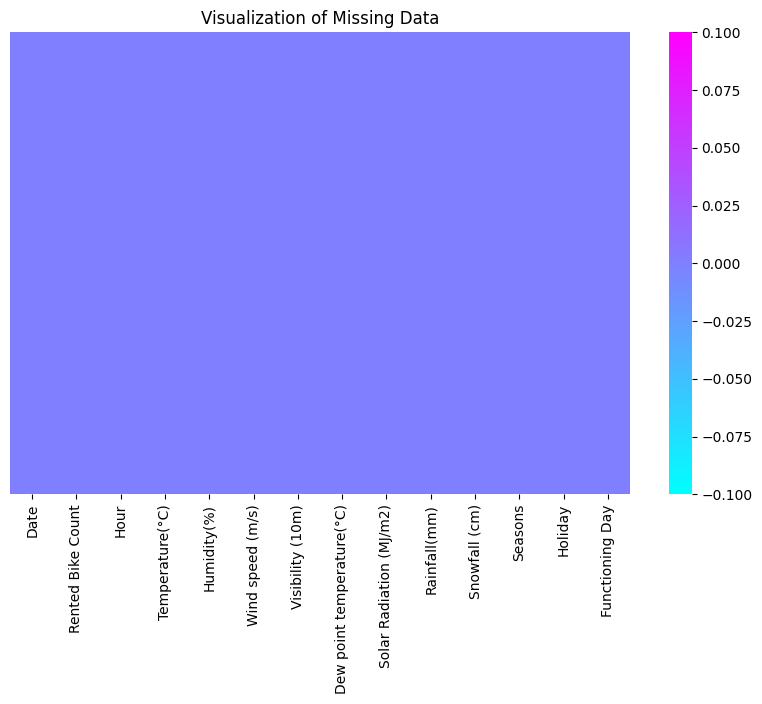

In [97]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_data.isnull(), cmap='cool', annot=False, yticklabels=False)
plt.title('Visualization of Missing Data')
plt.show()

### What did you know about your dataset?

By exploring SeoulBikeRental dataset following insights were found:

The dataset has 8760 Records & 16 Features . Features are described below -

- Date : Bike rental date.
- Rented_Bike_Count : Count of bikes rented per hour.
- Hour : Time of the day (0-23).
- Temperature(°C) : Temperature in degrees Celsius.
- Humidity(%) : Humidity percentage.
- Windspeed(m/s) : Wind speed in meters per second.
- Visibility(10m) : Visibility in meters.
- Dew point temperature(°C) : Dew point temperature in degrees Celsius.
- Solar Radiation (MJ/m2) : Solar radiation in MegaJoules per square meter.
- Rainfall(mm) : Rainfall in millimeters.
- Snowfall (cm) : Snowfall in centimeters.
- Seasons : Season of the year (spring, summer, fall, winter).
- Holiday : Indicates whether it's a holiday.
- Functional Day : Indicates whether it's a functional day (working day).

No such missing value as well as duplicate data were found from the data set.

Also we found that among all 16 features

- There are four categorical columns in the dataset: "Functional Day", "Holiday", "Seasons" and "Date". To enhance analysis, "Date" should be transformed into a datetime type to extract day, month, and year values. Meanwhile, the remaining three columns, "Functional Day", "Holiday" and "Seasons", need to be converted into numerical format using encoding techniques.
- Rest 10 are numerical coulmns.

# Changing datatype

In [98]:
#Converting to date type
bike_data['Date'] = pd.to_datetime(bike_data['Date'], infer_datetime_format=True)

##Extracting date, month, year from date and adding to dataset

#Extracting month from date column
bike_data['Month'] = bike_data['Date'].dt.month

#Extracting day name from date
bike_data['Day'] = bike_data['Date'].dt.day_name()

#Extracting year
bike_data['Year'] = bike_data['Date'].dt.year

#Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_data['Weekdays_or_weekend']=bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [99]:
bike_data.drop(['Date', 'Day', 'Year'], axis=1, inplace=True)

In [100]:
bike_data.shape

(8760, 15)

## ***2. Understanding Your Variables***

In [101]:
# Dataset Columns
print(bike_data.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Weekdays_or_weekend'],
      dtype='object')


In [102]:
# renaming the column name
bike_data.rename({'Temperature(°C)': 'Temperature',
                  'Humidity(%)': 'Humidity',
                  'Rented Bike Count': 'Rented_bike_count',
                  'Wind speed (m/s)': 'Wind_speed',
                  'Visibility (10m)': 'Visibility',
                  'Dew point temperature(°C)': 'Dew_point_temperature',
                  'Solar Radiation (MJ/m2)': 'Solar_radiation',
                  'Rainfall(mm)': 'Rainfall',
                  'Snowfall (cm)': 'Snowfall',
                  'Functioning Day': 'Functioning_day'},
                  axis = 1, inplace = True)

In [103]:
print(bike_data.columns)

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')


In [104]:
# Dataset Describe
numerical_columns = ['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
                     'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall']
bike_data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_bike_count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.7,5.10,14.80,27.20
Solar_radiation,8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.0,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.0,0.00,0.00,8.80


### Variables Description

- When analyzing data using a DataFrame, the default behavior is to provide insights for numeric columns. If the DataFrame contains only object and categorical data types, with no numeric columns, the default analysis will include both the object and categorical columns. However, when you specify include = 'all' as an option, the result will encompass attributes from both types, providing a comprehensive analysis that combines the characteristics of each.

- Extensive data cleaning isn't necessary because the numerical columns seem to have reasonable value ranges. However, some columns like Wind_speed, Dew_point_temperature, Solar_Radiation, Rainfall, and Snowfall exhibit skewness, evident from their median (50th percentile), which is considerably lower than their highest values.

- The categorical columns, namely Seasons, Holiday, Functioning_day, and Month, have multiple levels, which makes them less suitable for the describe() method. On the other hand, the numerical columns Hour and Weekdays_or_weekend exhibit behavior akin to categorical features. Therefore, we can examine their unique values and frequency counts to gain insights into their distribution and the variety of characteristics they represent.

### Check Unique Values for each variable.

In [105]:
# Check Unique Values for each variable.

## Check the unique values for Hour column
print("Hours =",bike_data["Hour"].unique())

# number of unique values in Hour column
print("Unique count =",bike_data["Hour"].nunique())

Hours = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique count = 24


In [106]:
## Check the unique values for Rented bike count column
print("Rented_bike_count =", bike_data["Rented_bike_count"].unique())

# number of unique values in Rented bike count column
print("Unique count =", bike_data["Rented_bike_count"].nunique())

Rented_bike_count = [ 254  204  173 ... 1538  804  595]
Unique count = 2166


In [107]:
## Check the unique values for Rented bike count column
print("Seasons =", bike_data["Seasons"].unique())

# number of unique values in Rented bike count column
print("Unique count =", bike_data["Seasons"].nunique())

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Unique count = 4


In [108]:
## Check the unique values for Holiday column
print("Holiday =",bike_data["Holiday"].unique())

# number of unique values in Holiday column
print("Unique count =",bike_data["Holiday"].nunique())

Holiday = ['No Holiday' 'Holiday']
Unique count = 2


In [109]:
## Check the unique values for Functioning_day column
print("Functioning_day =",bike_data["Functioning_day"].unique())

# number of unique values in Functioning_day column
print("Unique count =",bike_data["Functioning_day"].nunique())

Functioning_day = ['Yes' 'No']
Unique count = 2


In [110]:
## Check the unique values for Month column
print("Months =",bike_data["Month"].unique())

# number of unique values in Month column
print("Unique count =",bike_data["Month"].nunique())

Months = [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique count = 12


In [111]:
## Check the unique values for the Weekdays_or_weekend column
print("Weekdays_or_weekend =",bike_data["Weekdays_or_weekend"].unique())

# number of unique values in Weekdays_or_weekend column
print("Unique count =",bike_data["Weekdays_or_weekend"].nunique())

Weekdays_or_weekend = [0 1]
Unique count = 2


In [112]:
bike_data.shape

(8760, 15)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [113]:
## Question-1: How does the time of day influence bike rental counts across different season?

season_hour_rented = round(bike_data.groupby(['Seasons', 'Hour'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in seasons: \n" + "---"*12)
print(season_hour_rented)

Bike rental by each hour in seasons: 
------------------------------------
   Seasons  Hour  Rented_bike_count
0   Autumn     0              624.0
1   Autumn     1              486.0
2   Autumn     2              332.0
3   Autumn     3              226.0
4   Autumn     4              149.0
..     ...   ...                ...
91  Winter    19              304.0
92  Winter    20              243.0
93  Winter    21              240.0
94  Winter    22              225.0
95  Winter    23              173.0

[96 rows x 3 columns]


In [114]:
## Question-2: Is there a significant disparity in bike rental counts between hour and months?

hour_month_rented = round(bike_data.groupby(['Hour', 'Month'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in months: \n" + "---"*13)
print(hour_month_rented)

Bike rental by each hour in months: 
---------------------------------------
     Hour  Month  Rented_bike_count
0       0      1              315.0
1       0      2              300.0
2       0      3              411.0
3       0      4              526.0
4       0      5              632.0
..    ...    ...                ...
283    23      8              884.0
284    23      9              657.0
285    23     10              710.0
286    23     11              583.0
287    23     12              381.0

[288 rows x 3 columns]


In [115]:
## Question-3:  What are the monthly variations in bike rental counts and do these patterns differ between weekdays and weekends?

month_weekday_rented = round(bike_data.groupby(['Month', 'Weekdays_or_weekend'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each month in weekday or weekend: \n" + "---"*16)
print(month_weekday_rented)

Bike rental by each month in weekday or weekend: 
------------------------------------------------
    Month  Weekdays_or_weekend  Rented_bike_count
0       1                    0              414.0
1       1                    1              307.0
2       2                    0              397.0
3       2                    1              385.0
4       3                    0              629.0
5       3                    1              576.0
6       4                    0              795.0
7       4                    1              719.0
8       5                    0              808.0
9       5                    1             1194.0
10      6                    0              993.0
11      6                    1              954.0
12      7                    0              963.0
13      7                    1              848.0
14      8                    0              858.0
15      8                    1              731.0
16      9                    0              667.0
1

In [116]:
## Question-4: How does the time of day impact bike rentals on holidays?

hour_holiday_rented = round(bike_data.groupby(['Hour', 'Holiday'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in holiday: \n" + "---"*12)
print(hour_holiday_rented)

Bike rental by each hour in holiday: 
------------------------------------
    Hour     Holiday  Rented_bike_count
0      0     Holiday              466.0
1      0  No Holiday              545.0
2      1     Holiday              393.0
3      1  No Holiday              428.0
4      2     Holiday              304.0
5      2  No Holiday              302.0
6      3     Holiday              212.0
7      3  No Holiday              203.0
8      4     Holiday              128.0
9      4  No Holiday              133.0
10     5     Holiday               89.0
11     5  No Holiday              142.0
12     6     Holiday              133.0
13     6  No Holiday              296.0
14     7     Holiday              214.0
15     7  No Holiday              626.0
16     8     Holiday              348.0
17     8  No Holiday             1050.0
18     9     Holiday              379.0
19     9  No Holiday              660.0
20    10     Holiday              429.0
21    10  No Holiday              533.0
22   

In [117]:
## Question-5: Are there specific seasons when bike rental demand consistently fluctuates throughout the day?

season_rented = bike_data.groupby(['Seasons'])['Rented_bike_count'].mean()
season_rented = season_rented.sort_values(ascending=False).astype('int')

# Create a DataFrame from the Pandas Series
rented_season = pd.DataFrame({'Seasons': season_rented.index, 'Rented_bike_count': season_rented.values})
rented_season = rented_season.sort_values(by='Seasons')

# print result
print("Bike rental by each seasons: \n" + "---"*9)
print(rented_season)

Bike rental by each seasons: 
---------------------------
  Seasons  Rented_bike_count
1  Autumn                819
2  Spring                730
0  Summer               1034
3  Winter                225


In [118]:
1## Question-6: Do the hourly rental patterns differ between weekdays and weekends?

weeks_hourly_rented = round(bike_data.groupby(['Weekdays_or_weekend', 'Hour'])['Rented_bike_count'].mean().reset_index())

# Print result
print("Bike rental by each hour in weekday or weekend: \n" + "---"*16)
print(weeks_hourly_rented)

Bike rental by each hour in weekday or weekend: 
------------------------------------------------
    Weekdays_or_weekend  Hour  Rented_bike_count
0                     0     0              520.0
1                     0     1              402.0
2                     0     2              277.0
3                     0     3              186.0
4                     0     4              123.0
5                     0     5              144.0
6                     0     6              321.0
7                     0     7              700.0
8                     0     8             1178.0
9                     0     9              686.0
10                    0    10              525.0
11                    0    11              593.0
12                    0    12              682.0
13                    0    13              697.0
14                    0    14              716.0
15                    0    15              785.0
16                    0    16              903.0
17                  

In [119]:
## Question-7: How does the hour of the day impact the bike rental count and are there specific hours when rental demand is notably higher or lower?

rented_hour = bike_data.groupby('Hour')['Rented_bike_count'].mean()
rented_hour = rented_hour.sort_values(ascending=False).astype("int")

# Create a DataFrame from the Pandas Series
hourly_data = pd.DataFrame({'Hour': rented_hour.index, 'Rented_bike_count': rented_hour.values})

# Sort the DataFrame by 'Hour' to ensure correct order
hourly_data = hourly_data.sort_values(by='Hour')

# print result
print("Bike rental by each hours: \n" + "---"*9)
print(hourly_data)

Bike rental by each hours: 
---------------------------
    Hour  Rented_bike_count
16     0                541
18     1                426
19     2                301
21     3                203
23     4                132
22     5                139
20     6                287
14     7                606
5      8               1015
13     9                645
17    10                527
15    11                600
11    12                699
10    13                733
9     14                758
8     15                829
6     16                930
2     17               1138
0     18               1502
1     19               1195
3     20               1068
4     21               1031
7     22                922
12    23                671


In [120]:
## Question-8: How does the time of day affect bike rentals on standard functioning days?

hour_function_rented = round(bike_data.groupby(['Hour', 'Functioning_day'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in functioning day: \n" + "---"*15)
print(hour_function_rented)

Bike rental by each hour in functioning day: 
---------------------------------------------
    Hour Functioning_day  Rented_bike_count
0      0              No                0.0
1      0             Yes              561.0
2      1              No                0.0
3      1             Yes              442.0
4      2              No                0.0
5      2             Yes              313.0
6      3              No                0.0
7      3             Yes              211.0
8      4              No                0.0
9      4             Yes              137.0
10     5              No                0.0
11     5             Yes              144.0
12     6              No                0.0
13     6             Yes              298.0
14     7              No                0.0
15     7             Yes              627.0
16     8              No                0.0
17     8             Yes             1050.0
18     9              No                0.0
19     9             Yes    

In [121]:
## Question-9: How do seasons, holiday, functioning day, month, weekday or weekend collectively influence bike rentals?

my_categorical_columns = ["Seasons", "Holiday", "Functioning_day", "Month", "Weekdays_or_weekend"]

# Create a dictionary
my_rented_counts_by_category = {}

# Compute the total bike rental counts for each category within every categorical column
for column in my_categorical_columns:
    category_counts = bike_data.groupby(column)['Rented_bike_count'].mean().reset_index()
    my_rented_counts_by_category[column] = round(category_counts)

# Print the rental counts for each category
for column, data_count in my_rented_counts_by_category.items():
    print(f"Rental counts for {column}:\n" + "---"*12)
    print(data_count)
    print("\n")

Rental counts for Seasons:
------------------------------------
  Seasons  Rented_bike_count
0  Autumn              820.0
1  Spring              730.0
2  Summer             1034.0
3  Winter              226.0


Rental counts for Holiday:
------------------------------------
      Holiday  Rented_bike_count
0     Holiday              500.0
1  No Holiday              715.0


Rental counts for Functioning_day:
------------------------------------
  Functioning_day  Rented_bike_count
0              No                0.0
1             Yes              729.0


Rental counts for Month:
------------------------------------
    Month  Rented_bike_count
0       1              386.0
1       2              393.0
2       3              612.0
3       4              773.0
4       5              895.0
5       6              982.0
6       7              929.0
7       8              826.0
8       9              694.0
9      10              843.0
10     11              685.0
11     12              419.0


In [122]:
## Question-10: Do rental patterns during the day differ between weekdays and weekends in different seasons?

weekday_season_rented = round(bike_data.groupby(['Weekdays_or_weekend', 'Seasons'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each weekday or weekend in seasons: \n" + "---"*16)
print(weekday_season_rented)

Bike rental by each weekday or weekend in seasons: 
------------------------------------------------
   Weekdays_or_weekend Seasons  Rented_bike_count
0                    0  Autumn              845.0
1                    0  Spring              731.0
2                    0  Summer             1044.0
3                    0  Winter              233.0
4                    1  Autumn              759.0
5                    1  Spring              727.0
6                    1  Summer             1010.0
7                    1  Winter              207.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [123]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [124]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [125]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [126]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [127]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [128]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [129]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [130]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [131]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [132]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [133]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [134]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [135]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [136]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [137]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [138]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [139]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [140]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [141]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [142]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [143]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [144]:
# Expand Contraction

#### 2. Lower Casing

In [145]:
# Lower Casing

#### 3. Removing Punctuations

In [146]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [147]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [148]:
# Remove Stopwords

In [149]:
# Remove White spaces

#### 6. Rephrase Text

In [150]:
# Rephrase Text

#### 7. Tokenization

In [151]:
# Tokenization

#### 8. Text Normalization

In [152]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [153]:
# POS Taging

#### 10. Text Vectorization

In [154]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [155]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [156]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [157]:
# Transform Your data

### 6. Data Scaling

In [158]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [159]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [160]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [161]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [162]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [163]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [165]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [166]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [167]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [168]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [169]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [170]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [171]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***